<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1">Project description</a></span></li><li><span><a href="#Getting-to-know-data" data-toc-modified-id="Getting-to-know-data-2">Getting to know data</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3">Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Duplicates-detection" data-toc-modified-id="Duplicates-detection-3.0.1">Duplicates detection</a></span></li><li><span><a href="#Dealing-with-missing-data" data-toc-modified-id="Dealing-with-missing-data-3.0.2">Dealing with missing data</a></span></li><li><span><a href="#Removing-useless-predictors" data-toc-modified-id="Removing-useless-predictors-3.0.3">Removing useless predictors</a></span></li><li><span><a href="#Encoding-categorical-values" data-toc-modified-id="Encoding-categorical-values-3.0.4">Encoding categorical values</a></span></li><li><span><a href="#Making-train,-validation-and-test-dataset-splits" data-toc-modified-id="Making-train,-validation-and-test-dataset-splits-3.0.5">Making train, validation and test dataset splits</a></span></li><li><span><a href="#Scaling-data" data-toc-modified-id="Scaling-data-3.0.6">Scaling data</a></span></li><li><span><a href="#Inspecting-balance-of-classes" data-toc-modified-id="Inspecting-balance-of-classes-3.0.7">Inspecting balance of classes</a></span></li></ul></li></ul></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-4">Model selection</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1">Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-4.2">Support Vector Machines</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.3">Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Dealing-with-class-imbalances" data-toc-modified-id="Dealing-with-class-imbalances-5">Dealing with class imbalances</a></span><ul class="toc-item"><li><span><a href="#Upsampling-data" data-toc-modified-id="Upsampling-data-5.1">Upsampling data</a></span></li><li><span><a href="#Downsampling-data" data-toc-modified-id="Downsampling-data-5.2">Downsampling data</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

# Project description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.<br>
<b>The task</b> We need to predict whether a customer will leave the bank soon. In our possession the data on clients’ past behavior and termination of contracts with the bank.<br>
Build a model with the maximum possible F1 score. The F1 score should be at least 0.59 on the test set.<br>
Additionally, measure the AUC-ROC metric and compare it with the F1.<br>
<b>Data description</b>
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:<br>
<b>Features:</b><br>
<i>RowNumber</i> — data string index<br>
<i>CustomerId</i> — unique customer identifier<br>
<i>Surname</i> — surname<br>
<i>CreditScore</i> — credit score<br>
<i>Geography</i> — country of residence<br>
<i>Gender</i> — gender<br>
<i>Age</i> — age<br>
<i>Tenure</i> — period of maturation for a customer’s fixed deposit (years)<br>
<i>Balance</i> — credit score<br>
<i>NumOfProducts</i> — number of banking products used by the customer<br>
<i>HasCrCard</i> — customer has a credit card<br>
<i>IsActiveMember</i> — customer’s activeness<br>
<i>EstimatedSalary</i> — estimated salary<br>
<b>Target:</b><br>
<i>Exited</i> — сustomer has left.

# Getting to know data

In [1]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
#df = pd.read_csv('churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9746,9747,15782550,Ma,490,Germany,Female,41,0.0,139659.04,1,1,1,176254.12,0
1590,1591,15651802,Day,632,Spain,Female,39,5.0,97854.37,2,1,0,93536.38,0
9378,9379,15762682,Mitchell,709,Spain,Female,35,1.0,111827.27,2,1,0,12674.68,0
7041,7042,15753591,He,438,France,Male,38,2.0,0.00,2,1,0,136859.55,0
8225,8226,15804142,Tan,670,Spain,Female,57,3.0,175575.95,2,1,0,99061.75,1


<b>Conclusion</b>:<br>
- There are missing values in one of the columns. This needs to be further investigated and taken care of.<br>
- There are three useless predictors: RowNumber, Surname, CustomerId - that only increase dimensionality, but will not benefit a model.<br>
- Data has some categorical values that need to be transformed to numeric for some models.<br>

# Data Preparation

### Duplicates detection

In [5]:
df.duplicated().sum()

0

### Dealing with missing data

In [6]:
df['Tenure'].value_counts().sort_values(ascending=True)

0.0     382
10.0    446
6.0     881
9.0     882
4.0     885
7.0     925
5.0     927
3.0     928
8.0     933
2.0     950
1.0     952
Name: Tenure, dtype: int64

One of the obvious problems with the dataset is that roughly 10% of data is missing in the column Tenure, which is a period of maturation for a customer’s fixed deposit (years). Since this is a significant amount of data in this not that big dataset, it will not be wise to drop it. The reason why this information is missing could be that these are new customers and they have been with the bank for less than one year. Let's replace NaN with 0.

In [7]:
df['Tenure'] = df['Tenure'].fillna(0)

In [8]:
df['Tenure'] = df['Tenure'].astype('int')

### Removing useless predictors

In [9]:
del df['RowNumber']
del df['Surname']
del df['CustomerId']

### Encoding categorical values

Let's examine categorical values in the dataset.

In [10]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Both of the variables contain 2 to 3 categories. These categories are nominal, e.g. do not have inherent order. In this case we can use one-hot encoding technique to convert categorical variables to numeric.

In [12]:
df_ohe = pd.get_dummies(df, drop_first=True)

Two problem points are the credit score and age. They are highly correlated between each over, meaning the older the person the higher his credit score. We need to drop one of the predictors.

### Making train, validation and test dataset splits

Since we are choosing a model, we will split the data into training, validation and test sets in the following ratio: 3:1:1 respectively.

In [13]:
# Splitting into 80% and 20%
remainder, test = train_test_split(df_ohe, test_size=0.20, random_state=12345)
# splitting 80% into 75% and 25%, thus getting 60% and 20% of total respectively
train, valid = train_test_split(remainder, test_size=0.20, random_state=12345)
print(train.shape, test.shape, valid.shape)

(6400, 12) (2000, 12) (1600, 12)


In [14]:
features_train = train.drop(['Exited'], axis=1)
features_valid = valid.drop(['Exited'], axis=1)
features_test = test.drop(['Exited'], axis=1)
target_train = train['Exited']
target_valid = valid['Exited']
target_test = test['Exited']

### Scaling data

Standardizing numerical values to normal distribution to overestimation importance of predictors with lager values.

In [15]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Inspecting balance of classes

In [16]:
df_ohe.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The ratio of the categories in the target column is 3:1. Although it is not a perfect case of 50%:50%, yet it is not heavily imbalanced data set, in some cases it can be workable balance. Let's try to work with this data as is first and then we can apply some techniques: upsampling and downsampling to deal with imbalance to see the difference.

# Model selection

Our task is to predict a class: whether a customer will leave the bank or not, as such this is a classification problem. To solve this problem we need to pick a classification model. We will try Logistic Regression, Random Forest Classifier and Support Vector Machines. 

## Logistic Regression

In [17]:
logit = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=12345) 
logit.fit(features_train, target_train)
print(f'F1 score for train:{metrics.f1_score(target_train, logit.predict(features_train))}')
print(f'F1 score for valid:{metrics.f1_score(target_valid, logit.predict(features_valid))}')

F1 score for train:0.4959128065395096
F1 score for valid:0.4668192219679634


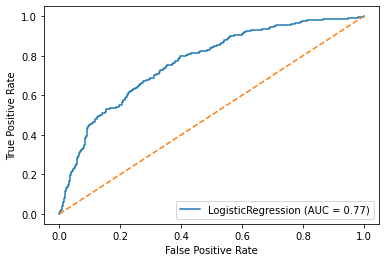

In [18]:
metrics.plot_roc_curve(logit, features_valid, target_valid);
plt.plot([0, 1], [0, 1], linestyle='--');

We have got very low F1 score even after some model tuning. Apparently, this model would be the best to go with.

## Support Vector Machines

In [19]:
clf = svm.SVC(random_state=12345)
clf.fit(features_train, target_train)
print(f'F1 score for train:{metrics.f1_score(target_train, clf.predict(features_train))}')
print(f'F1 score for valid:{metrics.f1_score(target_valid, clf.predict(features_valid))}')

F1 score for train:0.5627258647392875
F1 score for valid:0.5367965367965368


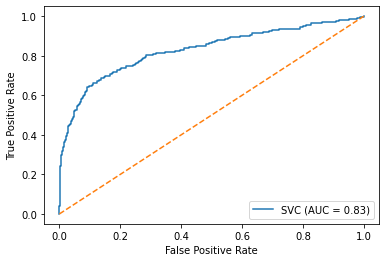

In [20]:
metrics.plot_roc_curve(clf, features_valid, target_valid);
plt.plot([0, 1], [0, 1], linestyle='--');

SVM gives higher F1 score than the previous model, but it is below the target F1 score and I was not able to achieve any improvement in F1 score by tuning hyper-parameters.

## Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(random_state=12345) #max_depth=11, n_estimators=100,class_weight='balanced'
rfc.fit(features_train, target_train)
print(f'F1 score for train:{metrics.f1_score(target_train, rfc.predict(features_train))}')
print(f'F1 score for valid:{metrics.f1_score(target_valid, rfc.predict(features_valid))}')

F1 score for train:1.0
F1 score for valid:0.5748502994011976


We got F1 of 0.575 with default hyper-parameters. Let's do some hyper-parameter tuning to see of we can get it above the passing mark of 0.59.

In [22]:
param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100],
    'class_weight': ['balanced', 'balanced_subsample', 'None'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12]
}

In [23]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1')
CV_rfc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          'None'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='f1')

In [24]:
print(CV_rfc.best_params_)

{'class_weight': 'balanced_subsample', 'max_depth': 9, 'n_estimators': 75}


In [25]:
print(f'F1 score for train:{metrics.f1_score(target_train, CV_rfc.predict(features_train))}')
print(f'F1 score for valid:{metrics.f1_score(target_valid, CV_rfc.predict(features_valid))}')

F1 score for train:0.7550143266475645
F1 score for valid:0.5900151285930407


By tuning hyper-parameters we were able to achieve the target F1 level. Let's re-write the model with best hyper-parameters to use it later.

In [26]:
rfc_best = RandomForestClassifier(max_depth=9, n_estimators=75, class_weight='balanced_subsample', random_state=12345)

Best out of three models that we tried is Random Forest Classifier. We will continue to work with it on the class imbalance task.

# Dealing with class imbalances

## Upsampling data

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [28]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [29]:
target_upsampled.value_counts()

1    5228
0    5093
Name: Exited, dtype: int64

In [30]:
rfc_best.fit(features_upsampled, target_upsampled)
predicted = rfc_best.predict(features_test)
F1_frc_model_best = metrics.f1_score(target_test, predicted)
print(F1_frc_model_best)

0.6299376299376299


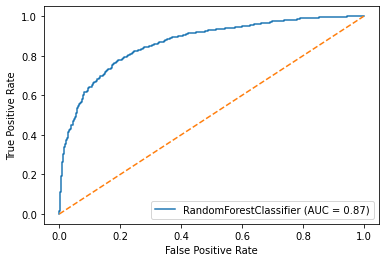

In [31]:
metrics.plot_roc_curve(rfc_best, features_test, target_test);
plt.plot([0, 1], [0, 1], linestyle='--');

In [32]:
metrics.roc_auc_score(target_test, rfc_best.predict_proba(features_test)[:,1])

0.8663601674033864

## Downsampling data

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [34]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.27)

In [35]:
target_downsampled.value_counts()

0    1375
1    1307
Name: Exited, dtype: int64

In [36]:
rfc_best.fit(features_downsampled, target_downsampled)
predicted = rfc_best.predict(features_test)
F1_frc_model_best = metrics.f1_score(target_test, predicted)
print(F1_frc_model_best)

0.6235521235521235


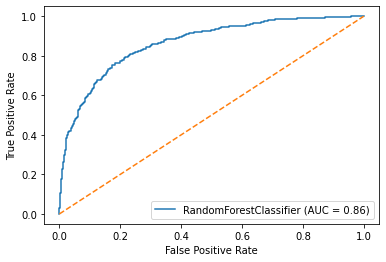

In [37]:
metrics.plot_roc_curve(rfc_best, features_test, target_test);
plt.plot([0, 1], [0, 1], linestyle='--');

In [38]:
metrics.roc_auc_score(target_test, rfc_best.predict_proba(features_test)[:,1])

0.8644172518986228

# Conclusion

We studied the data, prepared it and identified class imbalance. Three models were tested: Logit, SVM and Random Forest Classifier. The model with the hight F1 score was Random Forest Classifier. We were able to achieve 0.59 F1 with tuning hyper-parameters.<br/>
We also tried upsampling and downsampling techniques to deal with classes imbalance. It was discovered that the higher F1 score was achieved using upsampling method. When we traind and tested the model on the downsampled data, we were able to achieve F1=0.64.